In [8]:
from tqdm import tqdm

# Импортируем основные модули pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [38]:
class ConvNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
        # self.conv3 = nn.Conv2d(32, 32, 3, 1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.fc1 = nn.Linear(4*4*64, 500)
        self.dropout1 = nn.Dropout()
        self.fc2 = nn.Linear(500, 10)


    def forward(self, x):
        x = F.relu(self.conv1(x))

        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        # x = F.relu(self.conv3(x))
        # x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)

        return x

In [39]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 20
BATCH_SIZE = 256

# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='../data/cifar/train', train=True, download=True, transform=ToTensor())
test_data = datasets.CIFAR10(root='../data/cifar/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = ConvNet().to(device)  # создаем модель
optimizer = torch.optim.AdamW(model.parameters())  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

Files already downloaded and verified
Files already downloaded and verified


In [40]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in tqdm(enumerate(train_loader)):  # разбиваем выборку на пакеты
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(batch)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

196it [00:11, 16.94it/s]


Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.5406367778778076


196it [00:11, 17.59it/s]


Эпоха 2 завершилась с функцией стоимости на последнем пакете = 1.4219441413879395


196it [00:10, 18.09it/s]


Эпоха 3 завершилась с функцией стоимости на последнем пакете = 1.24552583694458


196it [00:11, 16.91it/s]


Эпоха 4 завершилась с функцией стоимости на последнем пакете = 1.1452796459197998


196it [00:10, 18.01it/s]


Эпоха 5 завершилась с функцией стоимости на последнем пакете = 1.1350899934768677


196it [00:10, 18.13it/s]


Эпоха 6 завершилась с функцией стоимости на последнем пакете = 0.9554909467697144


196it [00:10, 18.42it/s]


Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.8484784364700317


196it [00:10, 18.18it/s]


Эпоха 8 завершилась с функцией стоимости на последнем пакете = 1.3678243160247803


196it [00:10, 18.15it/s]


Эпоха 9 завершилась с функцией стоимости на последнем пакете = 1.0520095825195312


196it [00:10, 18.45it/s]


Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.8909989595413208


196it [00:10, 18.44it/s]


Эпоха 11 завершилась с функцией стоимости на последнем пакете = 0.8980705142021179


196it [00:10, 18.21it/s]


Эпоха 12 завершилась с функцией стоимости на последнем пакете = 0.5187561511993408


196it [00:10, 18.39it/s]


Эпоха 13 завершилась с функцией стоимости на последнем пакете = 0.8652652502059937


196it [00:10, 18.31it/s]


Эпоха 14 завершилась с функцией стоимости на последнем пакете = 0.6700414419174194


196it [00:11, 17.78it/s]


Эпоха 15 завершилась с функцией стоимости на последнем пакете = 0.5752639770507812


196it [00:10, 18.46it/s]


Эпоха 16 завершилась с функцией стоимости на последнем пакете = 0.6513769030570984


196it [00:11, 17.78it/s]


Эпоха 17 завершилась с функцией стоимости на последнем пакете = 0.7290550470352173


196it [00:11, 17.49it/s]


Эпоха 18 завершилась с функцией стоимости на последнем пакете = 0.6420148015022278


196it [00:11, 17.57it/s]


Эпоха 19 завершилась с функцией стоимости на последнем пакете = 0.7347397208213806


196it [00:11, 17.73it/s]

Эпоха 20 завершилась с функцией стоимости на последнем пакете = 0.49760717153549194


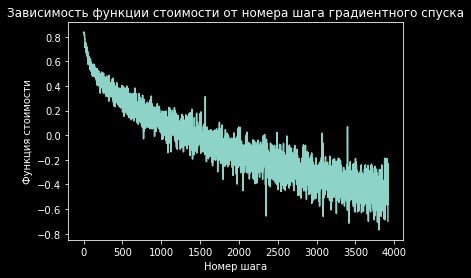

In [41]:
# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [42]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions))

Точность (accuracy) на обучающей выборке: 0.7943
Точность (accuracy) на тестовой выборке: 0.7003
